# Part III, Lab 3
## Moments of distribution
1. create functions for mean, var and skew
2. apply your functions to a standard normal distribution of 1000 values
2. check your skew function against `scipy.stats.skew`

In [3]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [4]:
def mean(x):
    N = len(x)
    return sum(x)/N

In [5]:
def variance(x):
    N = len(x)
    return sum((x-mean(x))**2)/(N-1)

In [6]:
def skew(x):
    N = len(x)
    
    return (1/N)*(sum(((x-mean(x))/sqrt(variance((x))))**3))

In [7]:
x = random.standard_normal(1000)

In [8]:
print(mean(x), variance(x), skew(x))


0.0136567871613 1.08174596171 -0.01706460805


In [9]:
from scipy import stats

stats.skew(x)

-0.017090236995633633

## Standard normal distribution
1. Create a distribution by adding to a first set of 500 data values that represent a standard normal distribtion a second distribution that you obtain by applying the following operation: $a \rightarrow 0.5a-1.5$. Make a histogram of that combined distribution with 20 bars.
2. Calculate the skew. Repeat the same exercise but applying for the second set the operation $a \rightarrow 0.3a+2.$

In [10]:
vals = random.standard_normal(500)

In [11]:
vals2 = 0.5*vals - 1.5

In [12]:
all_vals = array([vals, vals2])


<IPython.core.display.Javascript object>


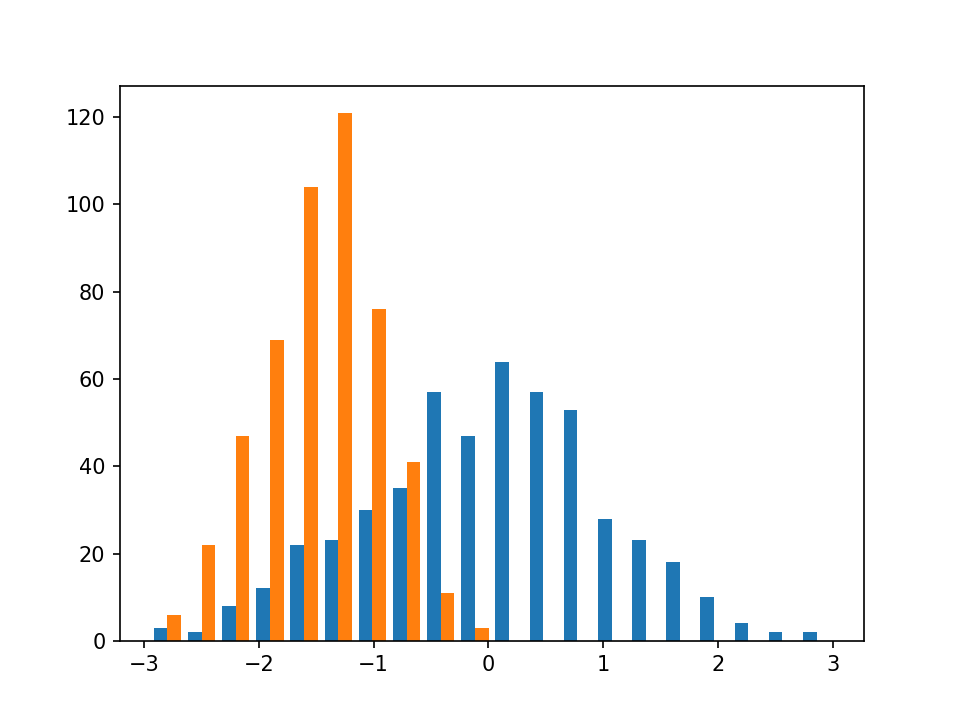

[array([  3.,   2.,   8.,  12.,  22.,  23.,  30.,  35.,  57.,  47.,  64.,
         57.,  53.,  28.,  23.,  18.,  10.,   4.,   2.,   2.]),
 array([   6.,   22.,   47.,   69.,  104.,  121.,   76.,   41.,   11.,
           3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.])]

In [16]:
ifig=1;close(ifig);figure(ifig)

n=20
plt.hist([all_vals[0], all_vals[1]],n)[0] #plots the distribution and the altered distribution together so you can see the change

<IPython.core.display.Javascript object>


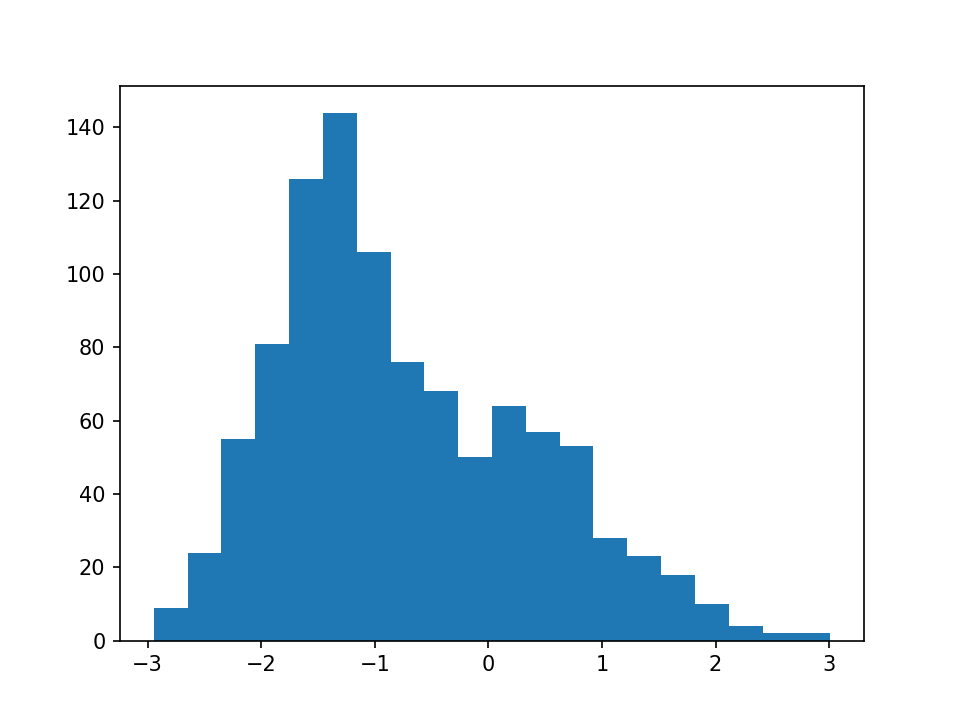

In [17]:
ifig=2;close(ifig);figure(ifig)
xcounts1, xbins1, _ = plt.hist(all_vals.flatten(), n)

In [18]:
skew(all_vals)

0.015811608567677791

In [19]:
vals3 = 0.3*vals + 2

In [20]:
allvals = array([vals, vals3])

<IPython.core.display.Javascript object>


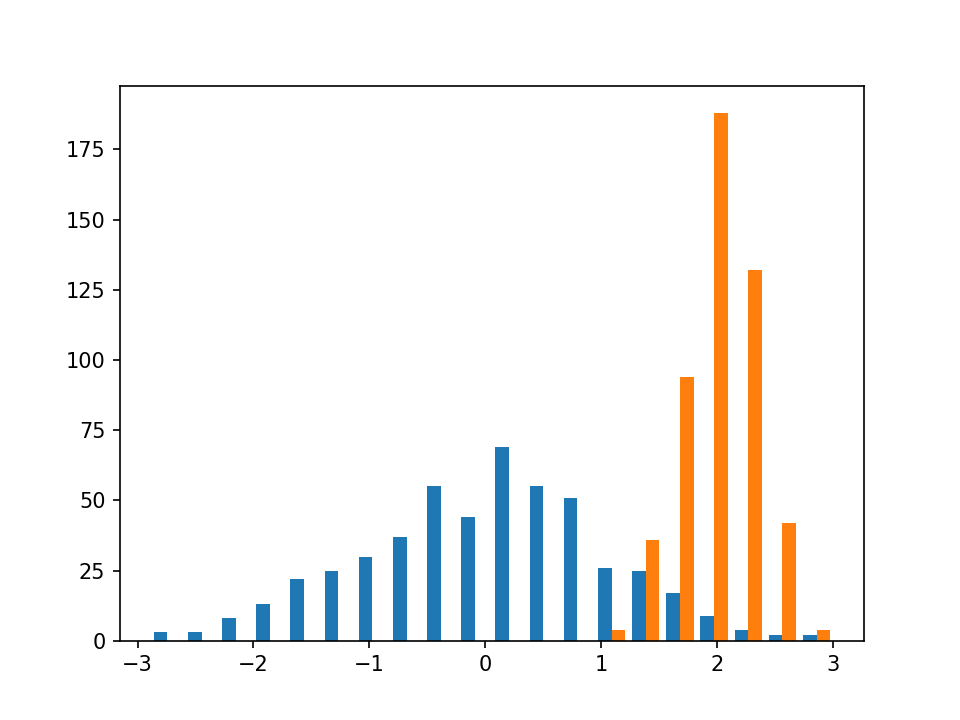

([array([  3.,   3.,   8.,  13.,  22.,  25.,  30.,  37.,  55.,  44.,  69.,
          55.,  51.,  26.,  25.,  17.,   9.,   4.,   2.,   2.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    4.,   36.,   94.,  188.,  132.,
           42.,    4.])],
 array([-2.88938743, -2.59449439, -2.29960136, -2.00470833, -1.7098153 ,
        -1.41492227, -1.12002924, -0.82513621, -0.53024318, -0.23535014,
         0.05954289,  0.35443592,  0.64932895,  0.94422198,  1.23911501,
         1.53400804,  1.82890107,  2.12379411,  2.41868714,  2.71358017,
         3.0084732 ]),
 <a list of 2 Lists of Patches objects>)

In [34]:
ifig=3;close(ifig);figure(ifig)

n=20
plt.hist([allvals[0], allvals[1]],n) #does the same for the second change


<IPython.core.display.Javascript object>


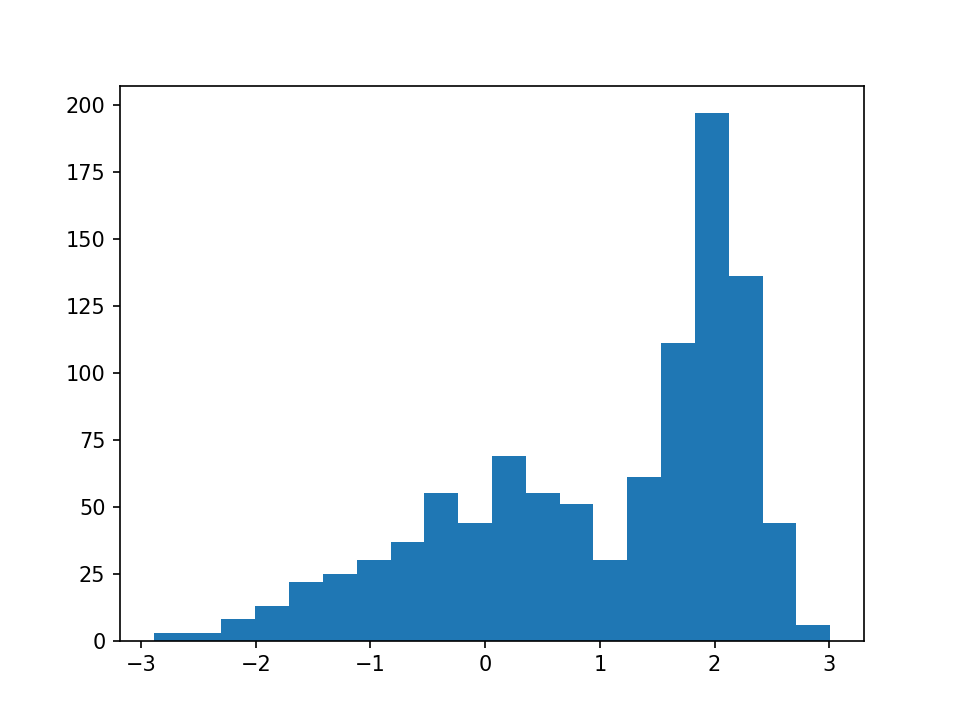

In [36]:
ifig=4;close(ifig);figure(ifig)
xcounts2, xbins2, _ = plt.hist(allvals.flatten(), n)
plt.show()

In [23]:
xcounts2

array([   3.,    3.,    8.,   13.,   22.,   25.,   30.,   37.,   55.,
         44.,   69.,   55.,   51.,   30.,   61.,  111.,  197.,  136.,
         44.,    6.])

## Least-square fitting
Fit a Gaussian (propability denisty of the normal distribution) to bpth skewed distributions from the previous part.

In [24]:
def gaussian(x,mu,var):
    thing = sqrt(2*pi*var)
    thang = -(x-mu)**2/(2.*var)
    return exp(thang)/thing #definition of a gaussian function I think

In [25]:
normdata1 = xcounts1/(sum(diff(xbins1)*xcounts1))

In [26]:
normdata2 = xcounts1/(sum(diff(xbins2)*xcounts2))

In [27]:
from scipy.optimize import curve_fit

In [28]:
(meanfit, varfit), _ = curve_fit(gaussian, xbins1[0:-1], normdata1, p0 = [0,1])

<IPython.core.display.Javascript object>


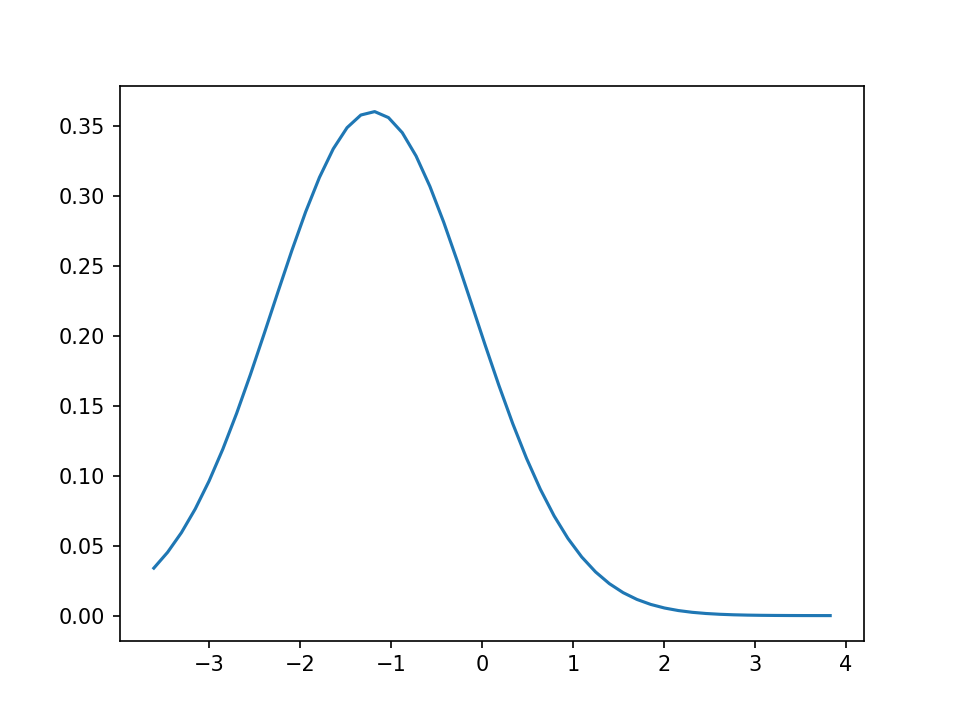

In [32]:
xx = linspace(min(x), max(x), 50)

plt.close()
ifig=5;close(ifig);figure(ifig)
plt.plot(xx, gaussian(xx, meanfit, varfit))
plt.show()

In [30]:
#Just did it for one of them

## Linear correlation


1. create a point cloud by plotting to normal distribtions against each other. Each as 500 values.
2. Create a linear shear mapping transformation matrix `T2 = matrix([[1,1.],[0,1]])` to these double-normal (x,y) data points. Plot both data sets in one plot.
3. Write a function that calculates Pearson's r correlation coeffecient. Calculate the coefficent for both data sets. 
4. Compare your result with the equivalent `scipy.stats` routine.

<IPython.core.display.Javascript object>


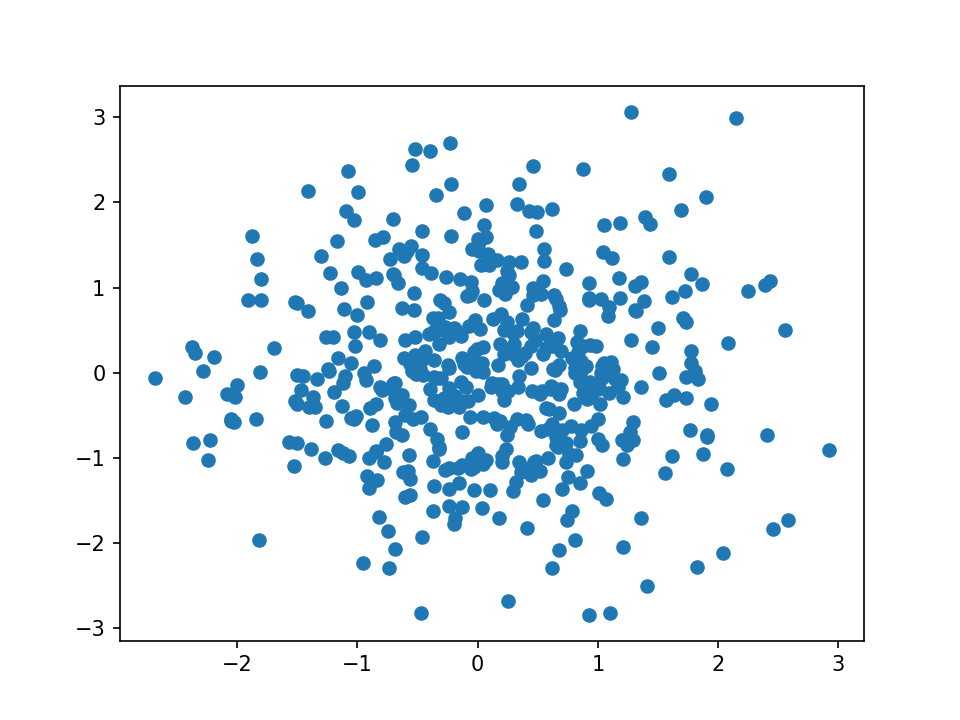

In [37]:
#creating the point cloud
ifig=6;close(ifig);figure(ifig)
a = random.standard_normal(500)
b = random.standard_normal(500)
plt.scatter(a, b) 

In [39]:
T2 = matrix([[1,1.],[0,1]])
shear = dot(T2, (a,b)).T

In [40]:
shear[:,0]

matrix([[ 0.71527286],
        [ 0.43181636],
        [-1.44324083],
        [-0.92929421],
        [ 0.73159846],
        [ 1.25791993],
        [ 0.64479107],
        [-0.4166778 ],
        [ 0.57400885],
        [ 2.02267216],
        [-0.44149631],
        [ 2.89014146],
        [-2.42829872],
        [ 1.99837519],
        [-2.38716685],
        [ 1.41532799],
        [-0.4722666 ],
        [ 0.80574088],
        [-2.11777676],
        [ 1.2993997 ],
        [ 3.17823164],
        [ 1.25687212],
        [ 1.46040422],
        [ 2.94942837],
        [-1.120292  ],
        [ 3.92146805],
        [-0.94062896],
        [-0.73304405],
        [-0.82441006],
        [-0.06845687],
        [-1.28049029],
        [-1.05146651],
        [ 0.95847776],
        [-1.01391109],
        [ 0.7093265 ],
        [ 1.19125152],
        [ 1.55568961],
        [-0.24772421],
        [-3.78081625],
        [ 1.20716432],
        [ 0.65321111],
        [-1.40323273],
        [-0.98608816],
        [ 0

<IPython.core.display.Javascript object>


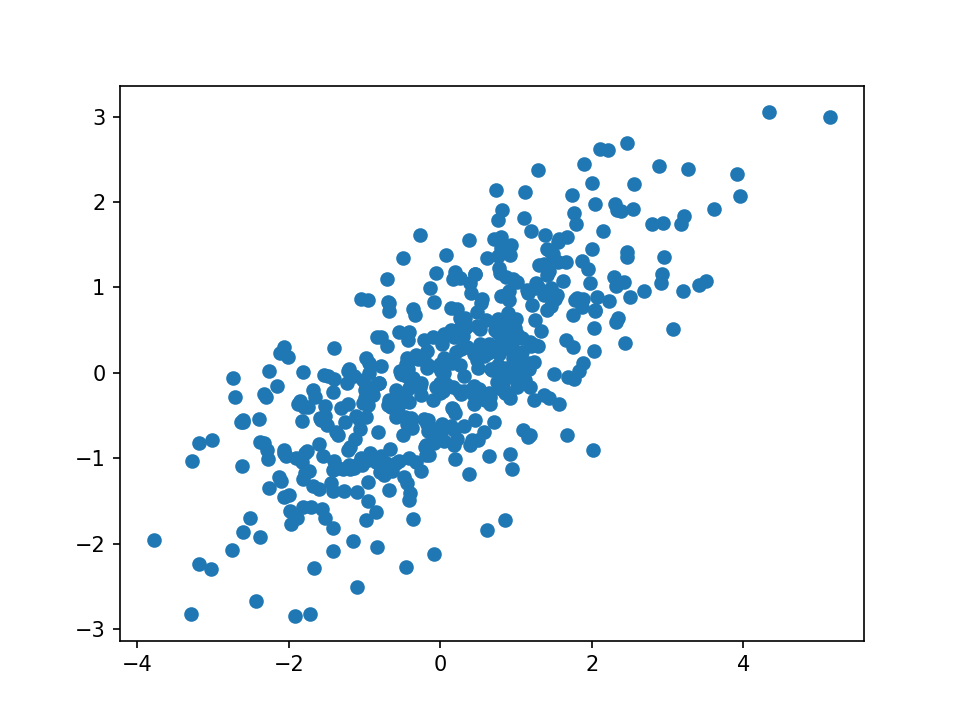

In [41]:
ifig=7;close(ifig);figure(ifig)
plt.plot(shear[:,0], shear[:,1], 'o')
plt.show()

In [44]:
PRCC = np.cov(shear)/np.std(a)/np.std(b)
PRCC

array([[ 0.8093176 ,  0.42495899, -0.09418804, ..., -0.08731908,
         0.11533218,  0.82358139],
       [ 0.42495899,  0.22313878, -0.04945655, ..., -0.04584977,
         0.06055898,  0.43244867],
       [-0.09418804, -0.04945655,  0.01096156, ...,  0.01016216,
        -0.01342231, -0.09584806],
       ..., 
       [-0.08731908, -0.04584977,  0.01016216, ...,  0.00942105,
        -0.01244345, -0.08885803],
       [ 0.11533218,  0.06055898, -0.01342231, ..., -0.01244345,
         0.01643547,  0.11736485],
       [ 0.82358139,  0.43244867, -0.09584806, ..., -0.08885803,
         0.11736485,  0.83809657]])